# Unit 5 - Financial Planning

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

# Compute current value of my crpto
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $66380.40
The current value of your 5.3 ETH is $18718.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [22]:
# Format current date as ISO format
today = pd.Timestamp("2021-10-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(tickers, timeframe, end=today, limit=1000).df.sort_index(ascending=False)

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-10-08 00:00:00-04:00  114.31  114.350  114.070  114.12  4207570  439.48   
2021-10-07 00:00:00-04:00  114.46  114.500  114.340  114.36  3586652  438.39   
2021-10-06 00:00:00-04:00  114.68  114.730  114.590  114.70  4748378  429.27   
2021-10-05 00:00:00-04:00  114.82  114.867  114.610  114.65  6211634  430.24   
2021-10-04 00:00:00-04:00  114.92  115.030  114.795  114.94  3969883  433.00   

                                                                
                               high     low   close     volume  
time                                                            
2021-10-08 00:00:00-04:00  439.8900  437.19  437.82   57510090  
2021-10-07 00:00:00-04:00  441.6800  438.20  438.64   64139858  
2021-10-06 00:00:00-04:00  435.1199  427.54  434.92   99477866  
2021-10-05 00:00:00-04:00  435.4900  429.39  433.05   82381830  
2021-10-04 00:00:00-04:00  433.9600  426.36  428.69  112134374

In [23]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $437.82


In [24]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21891.00
The current value of your 200 AGG shares is $22824.00


### Savings Health Analysis

In [106]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
df_savings

,amount
crypto,85099.311
shares,44715.000


Text(0, 0.5, 'Amount')

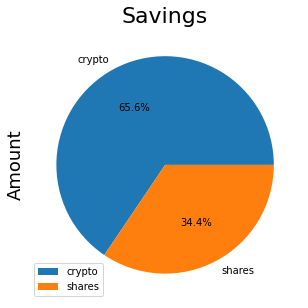

In [93]:
# Plot savings pie chart
df_savings.plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', subplots=True)

# Making Title and Y-Label more pronounced
import matplotlib.pyplot as plt
plt.title('Savings', fontdict = {'fontsize' : 22})
plt.ylabel('Amount', fontsize=18)

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You've raised more than 3 times your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You've met your financial goal of 3 times your monthly income in your emergency fund!")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund savings goal.")

Congratulations! You've raised more than 3 times your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-09', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2017-10-18 00:00:00-04:00  109.51  109.560  109.46  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.54  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-18 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-19 00:00:00-04:00  254.82  255.82  254.35  255.82  41439302.0  
2017-10-20 00:00:00-04:00  256.70  257.14  256.42  257.08  41153383.0  
2017-10-23 00:00:00-04:00  257.48  257.51  256.02  256.15  36345830.0  
2017-10-24 00:00:00-04:00  256.59  256.83  256.15  256.55  51308377.0

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=500,
    num_trading_days=252*30
)

In [99]:
# Printing the simulation input data
MC_30_yrs.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2017-10-18 00:00:00-04:00  109.51  109.560  109.46  109.530  1511319.0   
2017-10-19 00:00:00-04:00  109.71  109.750  109.54  109.610  1747693.0   
2017-10-20 00:00:00-04:00  109.32  109.405  109.26  109.305  1768427.0   
2017-10-23 00:00:00-04:00  109.40  109.470  109.36  109.410  1571621.0   
2017-10-24 00:00:00-04:00  109.23  109.290  109.17  109.200  1492997.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-18 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-19 00:00:00-04:00     0.000730  254.82  255.82  254.35  255.82   
2017-10-20 00:00:00-04:00    -0.002783  256.70  257.14  256.42  257.08   
2017-10-23 00:00:00-04:00     0.000961  257.48  257.51  256.02  256.15   
2017-10-24 00:00:00-04:00    -0.001919  256.59  256.83  256.15  256.55   

                                                    
                               volume daily_return  
time                                                
2017-10-18 00:00:00-04:00         NaN          NaN  
2017-10-19 00:00:00-04:00  41439302.0          NaN  
2017-10-20 00:00:00-04:00  41153383.0     0.004925  
2017-10-23 00:00:00-04:00  36345830.0    -0.003618  
2017-10-24 00:00:00-04:00  51308377.0     0.001562

In [100]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997862,0.989255,0.989925,0.995435,1.002582,0.993807,0.996311,1.002244,1.013966,1.002920,...,1.008914,1.001055,1.008904,0.992172,1.001644,0.991854,1.002453,1.004083,1.000669,0.990571
2,1.008171,1.000464,0.981072,0.984109,0.998033,0.995973,0.984942,0.998219,1.015366,0.997175,...,1.010068,1.007626,0.997815,0.986508,1.010167,0.995754,1.009140,1.011876,0.999245,0.992313
3,1.014226,1.013146,0.970965,0.984697,1.005286,1.007637,0.978831,0.986778,1.020571,0.998390,...,1.013566,1.006547,0.997594,0.991130,1.016127,1.002121,1.018916,1.013985,1.004249,0.999435
4,1.015244,1.023787,0.968876,0.980431,1.012919,1.014620,0.967988,0.990148,1.012034,1.001408,...,1.014179,0.996980,0.999380,1.002984,1.015673,1.003367,1.020757,1.010082,0.997683,0.993658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.125722,30.729600,14.969955,17.601688,11.273365,31.234194,13.574616,9.856218,6.470219,7.384306,...,8.789422,37.420728,31.991122,8.572715,9.073180,14.399604,20.372924,24.237043,17.207476,8.692214
7557,10.101814,30.496606,15.002750,17.506478,11.304309,31.147376,13.465760,9.911534,6.527000,7.323201,...,8.734883,37.353220,31.991627,8.531216,9.087667,14.498225,20.359620,24.437913,17.182253,8.712846
7558,10.105409,30.473191,15.145307,17.399231,11.380973,30.804936,13.557104,10.026091,6.558482,7.274627,...,8.765394,37.808199,31.957510,8.474218,9.078890,14.335881,20.201043,24.387311,17.053185,8.633135
7559,10.044281,30.584306,15.376560,17.310200,11.384450,30.838791,13.602599,9.968970,6.601309,7.327078,...,8.619836,38.385475,31.931054,8.574176,9.093054,14.345300,20.253452,24.051916,17.200013,8.530788


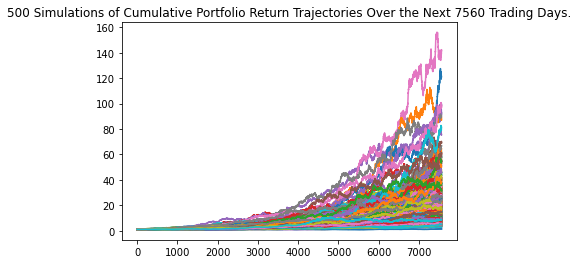

In [101]:
# Plot simulation outcomes
line_plot = MC_30_yrs.plot_simulation()

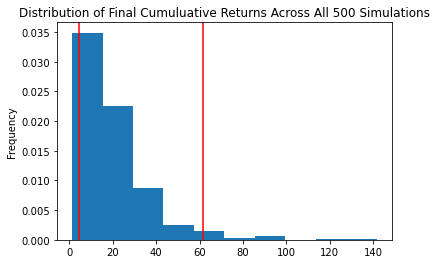

In [102]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_yrs.plot_distribution()

### Retirement Analysis

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30_yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             20.244096
std              16.709839
min               1.249157
25%               9.550132
50%              15.598313
75%              25.415669
max             141.632306
95% CI Lower      4.261204
95% CI Upper     61.496958
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [105]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85224.08 and $1229939.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [104]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round((summary_stats[8] * initial_investment), 2)
ci_upper = round((summary_stats[9] * initial_investment), 2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127836.12 and $1844908.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.10, .90],
    num_simulation=500,
    num_trading_days=252*5
)

In [109]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999695,1.009842,0.994971,0.993569,0.999961,0.996187,0.980928,1.006328,0.979936,0.988963,...,1.008438,0.984426,1.005259,0.999860,0.992213,1.010996,1.002031,0.967635,0.993562,1.010380
2,1.007707,1.010029,0.986145,0.985070,0.979719,1.005110,0.987477,1.003255,0.983809,0.982116,...,1.021355,1.008998,1.007365,1.022516,0.963012,0.989230,1.021185,0.961776,0.995157,1.011786
3,0.990777,1.014982,0.985786,0.987206,1.007194,0.983427,0.984624,1.003571,0.989127,0.980422,...,1.044547,1.004796,1.001428,1.034982,0.967292,0.988591,1.023469,0.937458,0.997166,1.010851
4,0.998328,0.985929,0.999314,1.017368,0.985564,0.997288,0.977887,1.006349,0.976442,0.988900,...,1.030362,0.994890,1.011117,1.054874,0.974333,0.987990,1.029273,0.913539,0.988646,0.987436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.673780,1.805941,2.675734,1.512908,1.168947,2.489362,1.835369,1.429617,1.588062,1.245042,...,1.570534,1.939390,2.023483,1.898218,1.352728,1.687927,2.023743,1.258317,3.825484,1.249487
1257,1.703563,1.819608,2.667709,1.488604,1.165208,2.463323,1.797587,1.439242,1.609718,1.259926,...,1.583982,1.934403,2.031679,1.856244,1.335656,1.670216,2.038283,1.283776,3.756959,1.262190
1258,1.686699,1.837368,2.706390,1.501369,1.164096,2.478518,1.795701,1.447272,1.608397,1.256222,...,1.592526,1.938682,2.061575,1.856719,1.326911,1.612793,2.028773,1.271076,3.727546,1.261989
1259,1.655536,1.829056,2.718247,1.499819,1.160881,2.462552,1.811184,1.454761,1.630516,1.244853,...,1.567995,1.886968,2.090489,1.840263,1.342228,1.600076,2.037314,1.269196,3.721549,1.252712


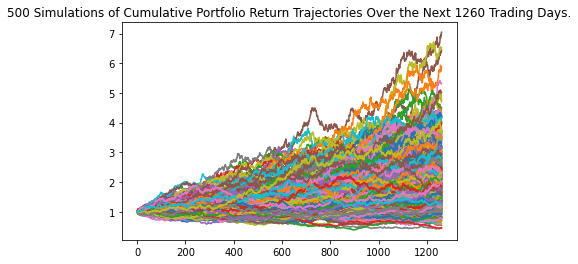

In [110]:
# Plot simulation outcomes
line_plot_5yrs = MC_5yrs.plot_simulation()

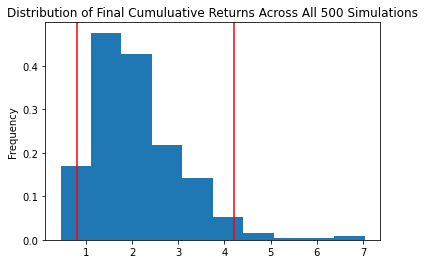

In [111]:
# Plot probability distribution and confidence intervals
distribution_plot_5yrs = MC_5yrs.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5yrs = MC_5yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5yrs)

count           500.000000
mean              2.109934
std               0.957617
min               0.447153
25%               1.415938
50%               1.919232
75%               2.588060
max               7.042939
95% CI Lower      0.796305
95% CI Upper      4.211533
Name: 1260, dtype: float64


In [113]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round((summary_stats_5yrs[8] * initial_investment), 2)
ci_upper_five = round((summary_stats_5yrs[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15926.1 and $84230.66


### Ten Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.10, .90],
    num_simulation=500,
    num_trading_days=252*10
)

In [118]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012373,0.993905,1.017250,1.016392,1.002102,1.001052,1.010689,0.995298,0.996892,1.009955,...,0.990715,1.002025,0.996804,0.996199,0.990605,0.999665,1.005242,1.020766,1.013965,1.012094
2,1.002165,0.964726,1.024511,1.013438,0.989172,0.985774,1.009524,0.996787,1.002737,1.006409,...,0.989071,1.007231,0.994983,0.997570,1.007038,0.996692,0.999925,0.995935,1.027221,1.021184
3,1.011013,0.992604,1.022903,1.014131,0.992884,0.986586,1.012663,1.002293,0.996808,1.011818,...,0.980383,0.999928,0.994424,1.018079,1.023347,0.976828,0.991818,1.017584,1.037168,1.020277
4,1.015798,1.001336,1.026584,1.003457,0.990616,0.984286,1.021632,0.980339,1.005163,1.018747,...,0.973605,0.996591,0.992131,1.016552,1.052065,0.978285,1.024476,0.990781,1.037438,1.024191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.626934,2.491113,6.431609,2.984366,2.129138,2.499851,1.888702,3.613388,8.001580,3.704998,...,4.925882,9.903243,7.197994,1.849219,3.439595,2.412145,11.524584,1.182265,1.413918,3.832197
2517,2.666019,2.535182,6.349122,2.950512,2.075524,2.518779,1.870267,3.582476,7.967331,3.731978,...,4.939000,9.714799,7.265956,1.870489,3.410317,2.459648,11.532491,1.194621,1.434882,3.763583
2518,2.666358,2.548529,6.282947,2.922402,2.080197,2.500502,1.917797,3.566356,8.066299,3.803035,...,4.895622,9.765206,7.279813,1.817477,3.493299,2.459936,11.733019,1.200945,1.442672,3.779635
2519,2.601349,2.547360,6.362427,2.904887,2.131984,2.497084,1.911117,3.552700,8.240114,3.856632,...,4.888999,9.692200,7.428143,1.857039,3.508961,2.458604,11.591660,1.196040,1.442824,3.780923


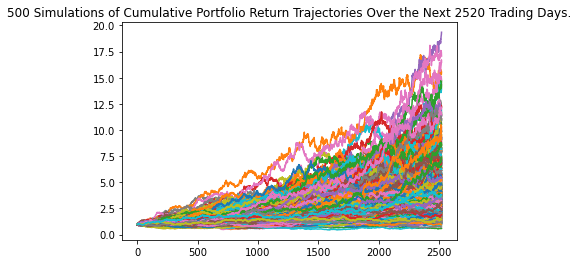

In [119]:
# Plot simulation outcomes
line_plot_10yrs = MC_10yrs.plot_simulation()

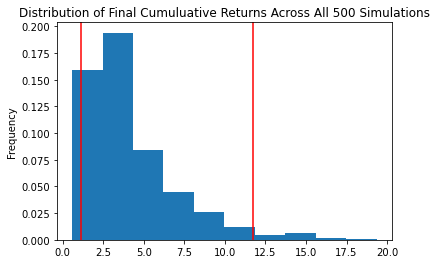

In [120]:
# Plot probability distribution and confidence intervals
distribution_plot_10yrs = MC_10yrs.plot_distribution()

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10yrs = MC_10yrs.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10yrs)

count           500.000000
mean              4.198937
std               2.833366
min               0.590426
25%               2.261134
50%               3.490872
75%               5.129311
max              19.347539
95% CI Lower      1.144037
95% CI Upper     11.741869
Name: 2520, dtype: float64


In [124]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $40,000
ci_lower_ten = round((summary_stats_10yrs[8] * initial_investment), 2)
ci_upper_ten = round((summary_stats_10yrs[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $45761.48 and $469674.75
